In [2]:
! pip install quandl

In [4]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 4.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.8 MB 4.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 3.9 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.8 MB 4.1 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.8 MB 4.1 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.8 MB 4.2 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.8 MB 4.1 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 3.9 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 4.0 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 4.0 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 4.1 MB/s eta 0:00:01
   -----------------------

## importing libraries

In [7]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

## imprting data

In [6]:
merged_df = pd.read_csv(r"C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\merged_df.csv")


In [8]:
merged_df.head()

,order_id,customer_id,order_status,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,...,geolocation_state_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_zip_code_prefix_seller,geolocation_city_seller,geolocation_state_seller,geolocation_lat_seller,geolocation_lng_seller,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,SP,"-2,36E+15","-4,66E+16",9350.0,maua,SP,"-2,37E+15","-4,65E+14",10,2017
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,SP,"-2,36E+15","-4,66E+16",9350.0,maua,SP,"-2,37E+16","-4,64E+15",10,2017
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,SP,"-2,36E+15","-4,66E+16",9350.0,mauA!,SP,"-2,37E+16","-4,64E+15",10,2017
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,SP,"-2,36E+15","-4,66E+16",9350.0,maua,SP,"-2,37E+15","-4,64E+15",10,2017
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,SP,"-2,36E+15","-4,66E+16",9350.0,maua,SP,"-2,37E+13","-4,64E+15",10,2017


In [9]:
print(merged_df.info())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17802941 entries, 0 to 17802940
Data columns (total 35 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   order_id                              object 
 1   customer_id                           object 
 2   order_status                          object 
 3   order_estimated_delivery_date         object 
 4   customer_unique_id                    object 
 5   customer_zip_code_prefix              int64  
 6   customer_city                         object 
 7   customer_state                        object 
 8   order_item_id                         int64  
 9   product_id                            object 
 10  seller_id                             object 
 11  shipping_limit_date                   object 
 12  price                                 float64
 13  freight_value                         float64
 14  payment_sequential                    float64
 15  payment_type 

In [12]:
merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'])


In [22]:
#create a subset of data tfrom 2015
df_subset = merged_df[merged_df['order_estimated_delivery_date'] >= '2015-01-01']


In [23]:
df_subset = df_subset.set_index('order_estimated_delivery_date')


In [24]:
df_subset = df_subset.sort_index()


In [25]:
df_subset.reset_index(inplace=True)


##  Plot the data using a line chart.

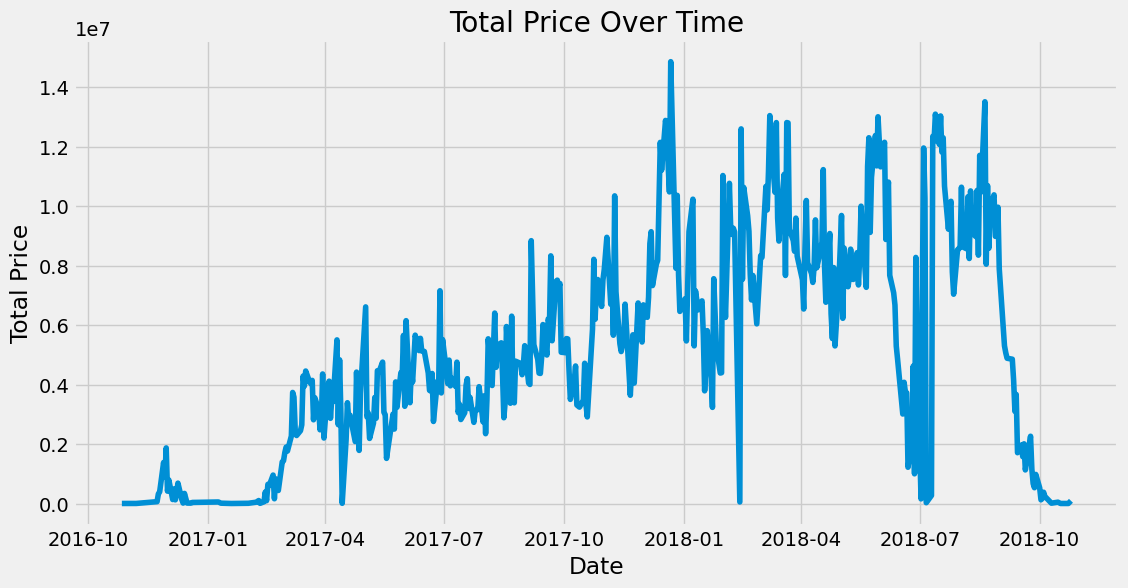

In [26]:
import matplotlib.pyplot as plt
# create new column for total sales from price and order item id
df_subset['total_price'] = df_subset['price'] * df_subset['order_item_id']

df_daily = df_subset.groupby('order_estimated_delivery_date')['total_price'].sum()

plt.figure(figsize=(12, 6))
plt.plot(df_daily)
plt.title('Total Price Over Time')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.grid(True)
plt.show()

##  Decomposition


In [44]:

# Perform time series decomposition using the multiplicative model with a 30-day period
result = seasonal_decompose(df_daily, model='multiplicative', period=30)

In [45]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

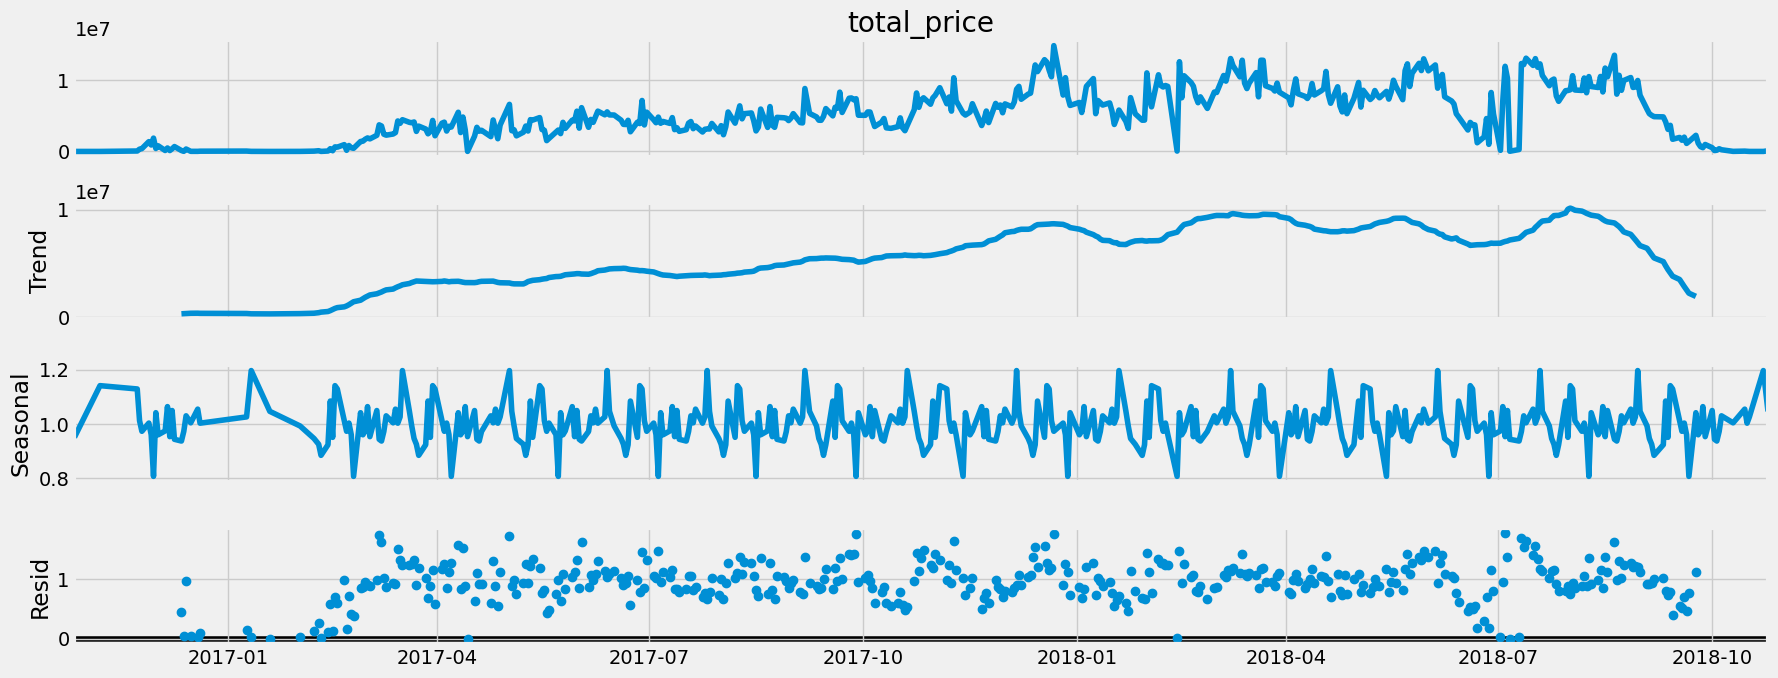

In [48]:
# Plot the separate components
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from statsmodels.tsa.seasonal import seasonal_decompose
result.plot()
plt.show()

### 4. Test for stationarity Dickey-Fuller test


In [52]:
# Perform a Dickey-Fuller test to check for stationarity.
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on original data (df_daily)
adf_test = adfuller(df_daily)

# Display ADF statistic and probability value
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

ADF Statistic: -2.6228471694691007
p-value: 0.0883665590463974


In [63]:
# Interpret the results of the Dickey-Fuller test.if adf_test[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")
    

The series is not stationary.


### Stationarizing the dataset to make it consistence

In [64]:
# Use difference to make data consistent.df_diff = df_daily.diff().dropna()

# Run the ADF test again on different data.adf_test_diff = adfuller(df_diff)

# Display ADF statistic and probability value for different dataprint(f"ADF Statistic (Differenced): {adf_test_diff[0]}")
print(f"p-value (Differenced): {adf_test_diff[1]}")


ADF Statistic (Differenced): -19.099859674679852
p-value (Differenced): 0.0


### Check for autocorrelations


<Figure size 1200x600 with 0 Axes>

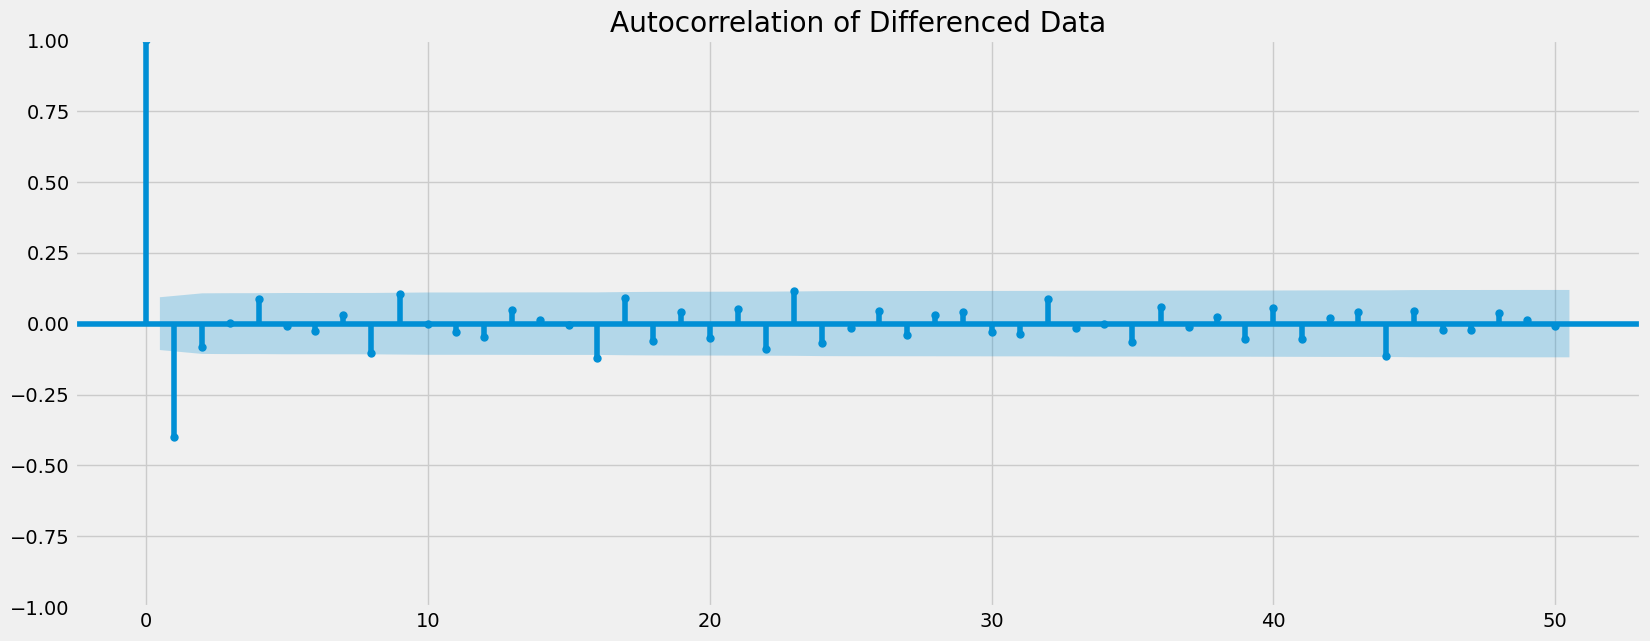

<Figure size 1200x600 with 0 Axes>

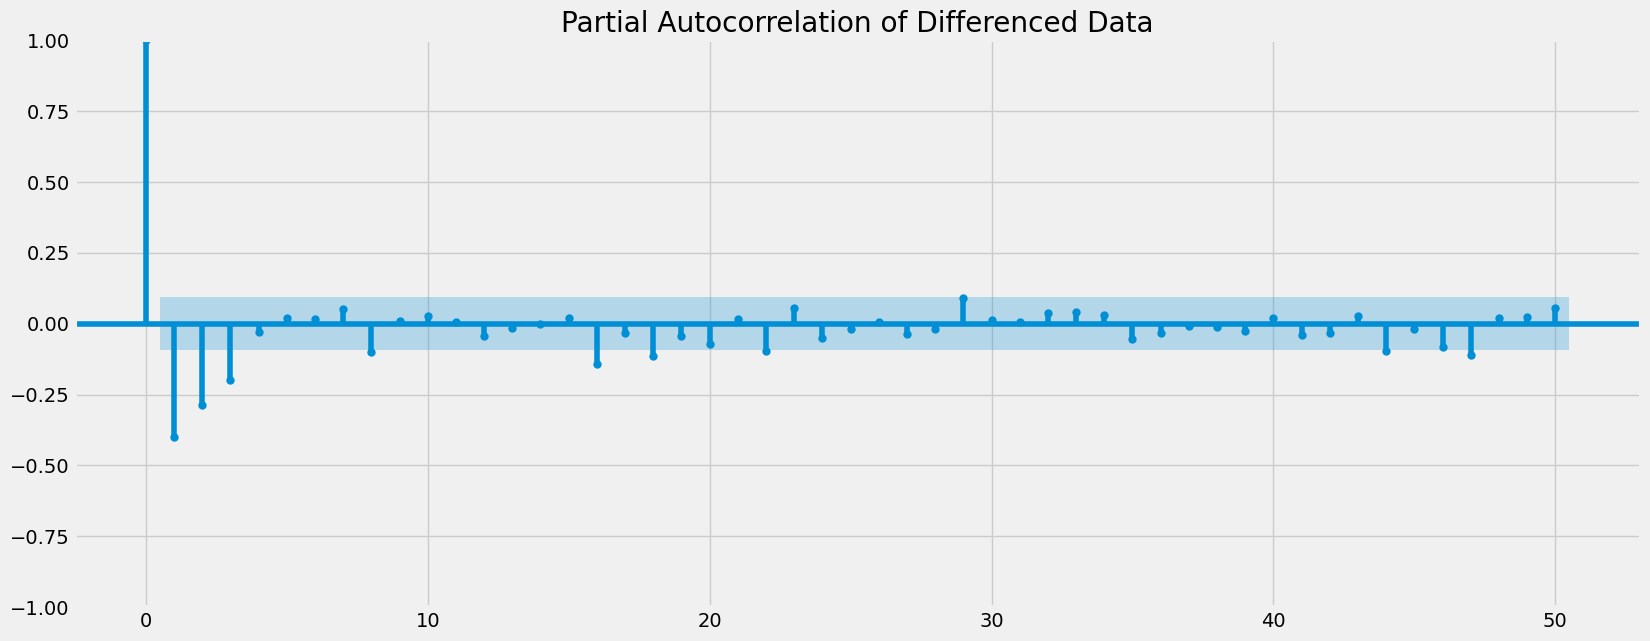

In [65]:
#Self-correlation inspection (ACF and PACF) of different datafrom statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Autocorrelation plot (ACF) for different dataplt.figure(figsize=(12, 6))
plot_acf(df_diff, lags=50)
plt.title('Autocorrelation of Differenced Data')
plt.show()

# Partial Autocorrelation (PACF) plot of different dataplt.figure(figsize=(12, 6))
plot_pacf(df_diff, lags=50)
plt.title('Partial Autocorrelation of Differenced Data')
plt.show()


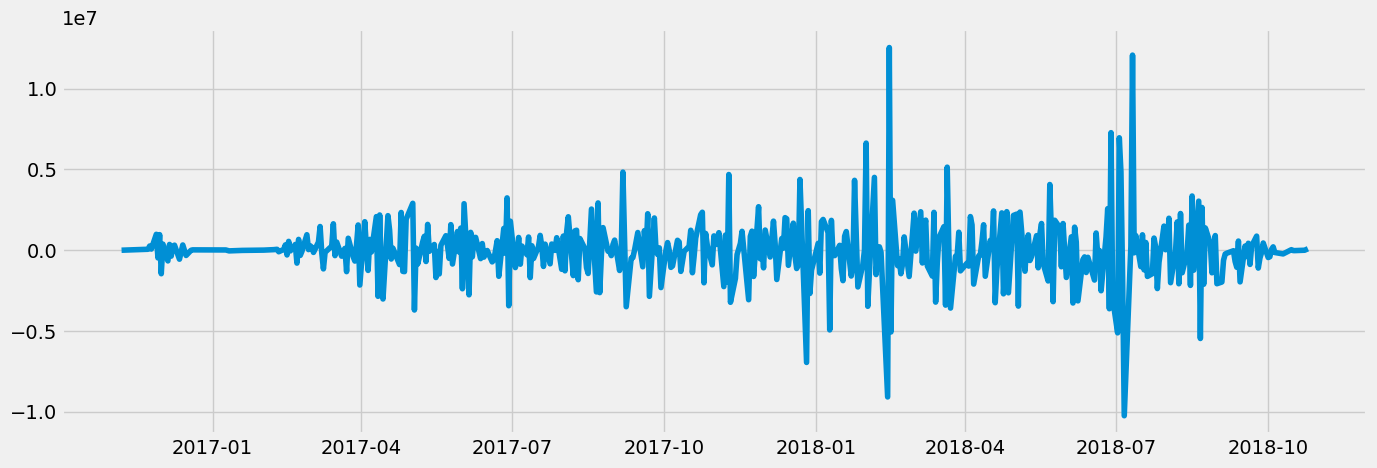

In [66]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [70]:

def dickey_fuller(timeseries):
    """ Perform the Augmented Dickey-Fuller test for stationarity """
    
    # Remove NaN and infinite values
    timeseries = timeseries.replace([np.inf, -np.inf], np.nan).dropna()

    print('Dickey-Fuller Stationarity test:')
    
    # Perform the test
    test = adfuller(timeseries, autolag='AIC')
    
    # Display results
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    
    print(result)

# Apply the test to the differenced data after cleaning it
dickey_fuller(data_diff)


Dickey-Fuller Stationarity test:
Test Statistic                 -19.099860
p-value                          0.000000
Number of Lags Used              2.000000
Number of Observations Used    440.000000
Critical Value (1%)             -3.445300
Critical Value (5%)             -2.868131
Critical Value (10%)            -2.570281
dtype: float64
